<a href="https://colab.research.google.com/github/LinkeshBS/pythonprojects/blob/main/handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow.keras.models

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

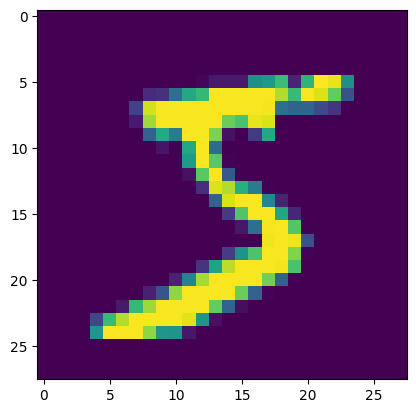

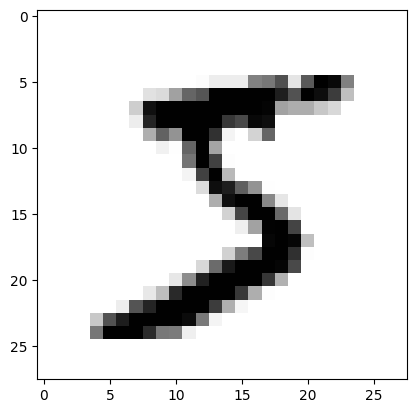

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap = plt.cm.binary)

Before  normalisation

In [ ]:
 print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Normalising the data

In [ ]:
x_train=tf.keras.utils.normalize(x_train, axis =1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0],cmap = plt.cm.binary)

NameError: name 'plt' is not defined

After normalising

In [ ]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(y_train[0])

5


Resizing images to make it suitable for apply convolution operation


In [ ]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("Training Samples dimension ", x_trainr.shape)
print("Testing Samples dimension ", x_testr.shape)

Training Samples dimension  (60000, 28, 28, 1)
Testing Samples dimension  (10000, 28, 28, 1)


Creating a Deep Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Activation,MaxPooling2D,Flatten,Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape= x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [ ]:
print("Total Training Samples =", len(x_trainr))

Total Training Samples = 60000


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [ ]:
model.fit(x_trainr,y_train,epochs=10,validation_split =0.3)

Epoch 1/10
1313/1313 [==============================] - 67s 51ms/step - loss: 0.0226 - accuracy: 0.9925 - val_loss: 0.0626 - val_accuracy: 0.9836
Epoch 2/10
1313/1313 [==============================] - 57s 44ms/step - loss: 0.0173 - accuracy: 0.9943 - val_loss: 0.0598 - val_accuracy: 0.9839
Epoch 3/10
1313/1313 [==============================] - 62s 47ms/step - loss: 0.0180 - accuracy: 0.9939 - val_loss: 0.0587 - val_accuracy: 0.9851
Epoch 4/10
1313/1313 [==============================] - 62s 47ms/step - loss: 0.0161 - accuracy: 0.9946 - val_loss: 0.0596 - val_accuracy: 0.9844
Epoch 5/10
1313/1313 [==============================] - 56s 43ms/step - loss: 0.0126 - accuracy: 0.9957 - val_loss: 0.1005 - val_accuracy: 0.9788
Epoch 6/10
1313/1313 [==============================] - 57s 43ms/step - loss: 0.0124 - accuracy: 0.9960 - val_loss: 0.0762 - val_accuracy: 0.9832
Epoch 7/10
1313/1313 [==============================] - 61s 46ms/step - loss: 0.0117 - accuracy: 0.9960 - val_loss: 0.0731 -

In [ ]:
test_loss,test_acc = model.evaluate(x_testr,y_test)
print("Test loss on 10,000 test samples ",test_loss)
print("Validation Accuracy on 10,000 test samples ",test_acc)

313/313 [==============================] - 3s 11ms/step - loss: 0.0676 - accuracy: 0.9867
Test loss on 10,000 test samples  0.06756111979484558
Validation Accuracy on 10,000 test samples  0.9866999983787537


In [ ]:
predictions = model.predict([x_testr])


313/313 [==============================] - 6s 19ms/step


In [ ]:
print(predictions)

[[2.4341249e-08 9.3699276e-07 1.9394703e-07 ... 9.9999827e-01
  1.4254029e-07 2.4210689e-07]
 [7.0918874e-12 5.2214710e-10 9.9999994e-01 ... 5.1767228e-12
  4.3355333e-11 2.7150715e-13]
 [5.3448574e-08 9.9999911e-01 2.4072419e-08 ... 4.6833796e-07
  2.0838635e-07 2.0984838e-09]
 ...
 [9.3694971e-18 7.6229192e-13 2.2736116e-14 ... 7.4152305e-15
  8.8988804e-13 6.5815207e-11]
 [2.2934364e-15 6.0138095e-10 8.8039615e-14 ... 1.9059804e-15
  2.9594700e-08 5.5819314e-13]
 [5.2202306e-08 5.0128122e-08 1.0313180e-08 ... 2.5714042e-11
  5.2148668e-08 4.2245114e-09]]


In [ ]:
print(np.argmax(predictions[0]))

7


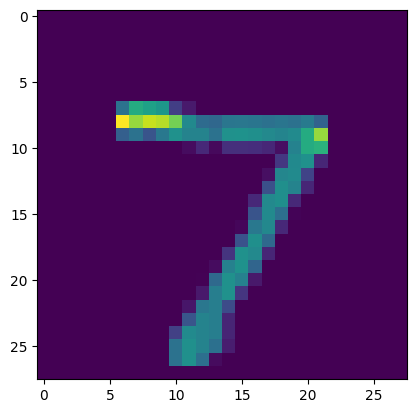

In [ ]:
plt.imshow(x_test[0])

In [ ]:
print(np.argmax(predictions[128]))

8


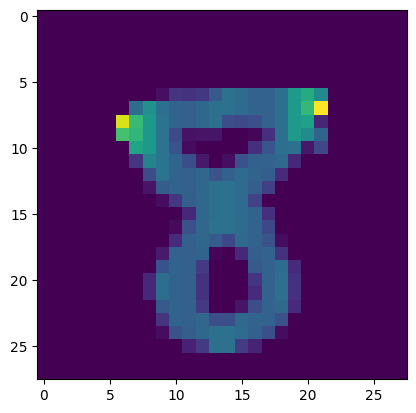

In [ ]:
plt.imshow(x_test[128])

Getting input data

In [ ]:
!pip install opencv-python

In [ ]:
import cv2

Loading the data


In [ ]:
img = cv2.imread('test1_image.jpg')

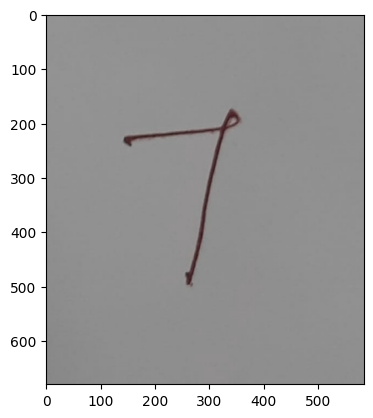

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [ ]:
img.shape

(680, 584, 3)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
gray.shape

(680, 584)

In [ ]:
resized = cv2.resize(gray,(28,28),interpolation =cv2.INTER_AREA)

In [ ]:
resized.shape

(28, 28)

View the resized img 28*28

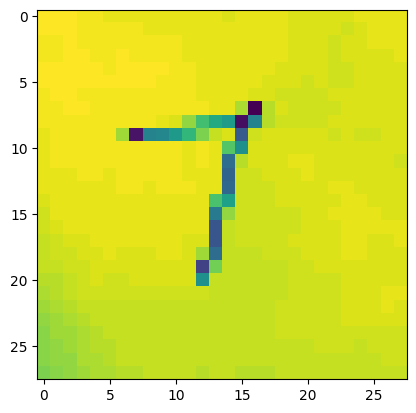

In [ ]:
plt.imshow(resized)

In [ ]:
new = tf.keras.utils.normalize(resized,axis=1)  # 0 to 1 scaling or normalising

In [ ]:
new = np.array(new).reshape(-1,IMG_SIZE,IMG_SIZE,1) # kernel operation for convolution layer

view the shape

In [ ]:
new.shape

(1, 28, 28, 1)

Predicting the output

In [ ]:
predictions = model.predict(new)

1/1 [==============================] - 0s 21ms/step


In [ ]:
print(np.argmax(predictions))

0
